In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data=pd.read_csv(r"C:\Credit Card Fraud Detection\notebook\data\credit_card_fraud.csv")

In [43]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
data.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      50000    1          2         1   57     -1      0     -1      0   
1      50000    1          1         2   37      0      0      0      0   
2     500000    1          1         2   29      0      0      0      0   
3     100000    2          2         2   23      0     -1     -1      0   
4     140000    2          3         1   28      0      0      2      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0      0  ...      20940      19146      19131      2000     36681     10000   
1      0  ...      19394      19619      20024      2500      1815       657   
2      0  ...     542653     483003     473944     55000     40000     38000   
3      0  ...        221       -159        567       380       601         0   
4      0  ...      12211      11793       3719      3329         0       432   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0      9000       689       679                           0  
1      1000      1000       800                           0  
2     20239     13750     13770                           0  
3       581      1687      1542                           0  
4      1000      1000      1000                           0  

[5 rows x 24 columns]

In [6]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   1001 non-null   int64
 1   SEX                         1001 non-null   int64
 2   EDUCATION                   1001 non-null   int64
 3   MARRIAGE                    1001 non-null   int64
 4   AGE                         1001 non-null   int64
 5   PAY_0                       1001 non-null   int64
 6   PAY_2                       1001 non-null   int64
 7   PAY_3                       1001 non-null   int64
 8   PAY_4                       1001 non-null   int64
 9   PAY_5                       1001 non-null   int64
 10  PAY_6                       1001 non-null   int64
 11  BILL_AMT1                   1001 non-null   int64
 12  BILL_AMT2                   1001 non-null   int64
 13  BILL_AMT3                   1001 non-null   int64
 14  BILL_AMT

In [8]:
data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [9]:
data.describe()

LIMIT_BAL          SEX    EDUCATION     MARRIAGE          AGE  \
count    1001.000000  1001.000000  1001.000000  1001.000000  1001.000000   
mean   167532.467532     1.589411     1.776224     1.604396    34.945055   
std    130587.921320     0.492187     0.750916     0.532298     9.219760   
min     10000.000000     1.000000     1.000000     0.000000    21.000000   
25%     50000.000000     1.000000     1.000000     1.000000    28.000000   
50%    140000.000000     2.000000     2.000000     2.000000    33.000000   
75%    240000.000000     2.000000     2.000000     2.000000    41.000000   
max    700000.000000     2.000000     6.000000     3.000000    75.000000   

             PAY_0        PAY_2        PAY_3        PAY_4        PAY_5  ...  \
count  1001.000000  1001.000000  1001.000000  1001.000000  1001.000000  ...   
mean     -0.004995    -0.161838    -0.164835    -0.283716    -0.283716  ...   
std       1.173446     1.228732     1.262459     1.184662     1.170224  ...   
min      -2.000000    -2.000000    -2.000000    -2.000000    -2.000000  ...   
25%      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
max       8.000000     7.000000     7.000000     7.000000     7.000000  ...   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count    1001.000000    1001.000000    1001.000000    1001.000000   
mean    40748.408591   39078.666334   38012.011988    5382.339660   
std     68206.929510   63108.238729   63074.415024   12180.755275   
min     -3684.000000  -28335.000000 -339603.000000       0.000000   
25%      1423.000000    1206.000000     830.000000    1000.000000   
50%     17710.000000   17580.000000   15846.000000    2184.000000   
75%     48851.000000   46404.000000   46557.000000    5090.000000   
max    628699.000000  484612.000000  473944.000000  199646.000000   

            PAY_AMT2       PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count    1001.000000    1001.000000    1001.000000    1001.000000   
mean     5051.400599    4176.149850    4671.488511    5331.049950   
std     15626.153184   10514.647502   13269.943983   16812.536877   
min         0.000000       0.000000       0.000000       0.000000   
25%       390.000000     228.000000     148.000000     189.000000   
50%      1710.000000    1206.000000    1398.000000    1306.000000   
75%      4500.000000    3720.000000    4000.000000    3745.000000   
max    285138.000000  133657.000000  188840.000000  195599.000000   

            PAY_AMT6  default payment next month  
count    1001.000000                 1001.000000  
mean     5090.704296                    0.213786  
std     23658.888052                    0.410183  
min         0.000000                    0.000000  
25%         0.000000                    0.000000  
50%      1250.000000                    0.000000  
75%      3784.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 24 columns]

In [10]:
def Visualizer(data,Type):
    if Type == 'Bar':
        for i in data.columns:
            sns.countplot(data[i])
            plt.xlabel(i)
            plt.ylabel('Count')
            plt.show()
    elif Type == 'Dist':
        for i in data.columns:
            sns.distplot(data[i])
            plt.xlabel(i)
            plt.ylabel('Count')
            plt.show()
    elif Type == 'Box':
        for i in data.columns:
            sns.boxplot(data[i])
            plt.xlabel(i)
            plt.ylabel('Count')
            plt.show()
    elif Type == 'Scatter':
        for i in data.columns:
            sns.scatterplot(x=data[i],y=data['default payment next month'])
            plt.xlabel(i)
            plt.ylabel('Count')
            plt.show()
    else:
        print("Invalid Type")

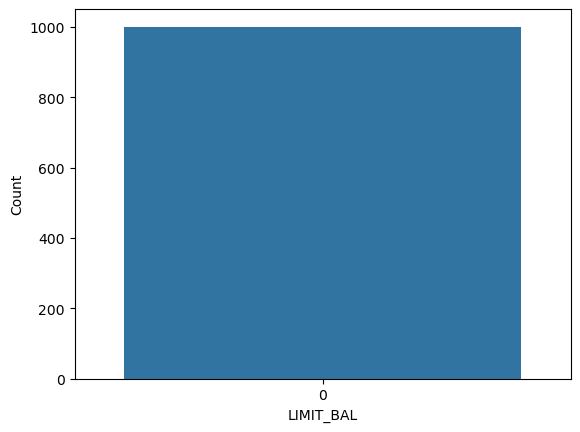

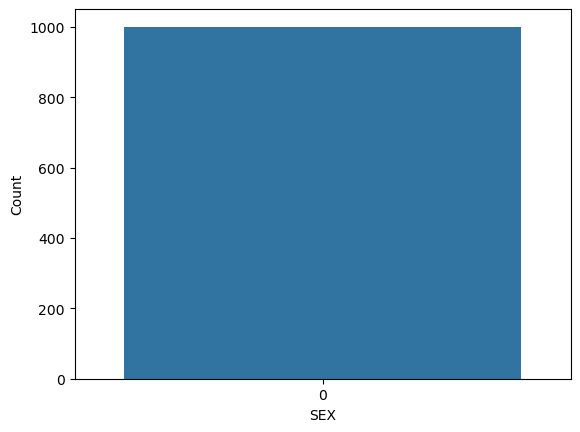

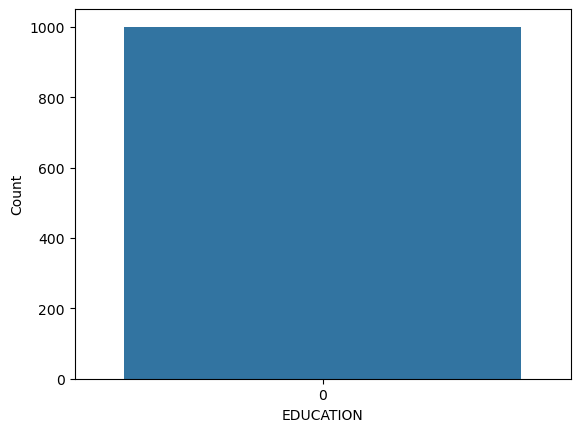

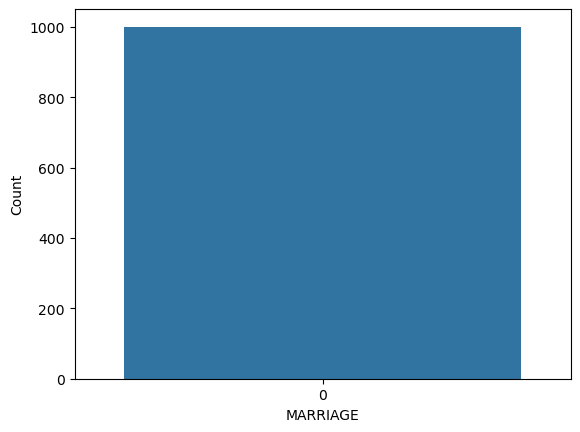

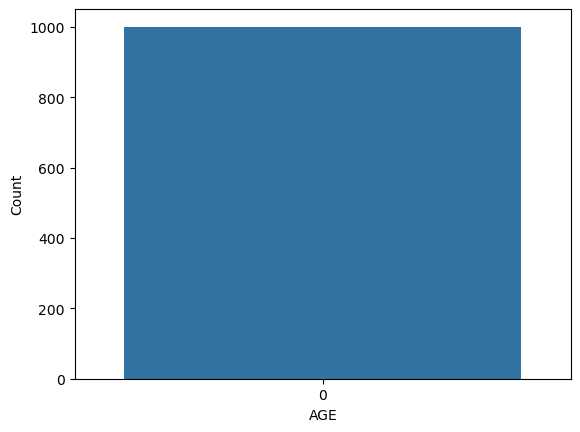

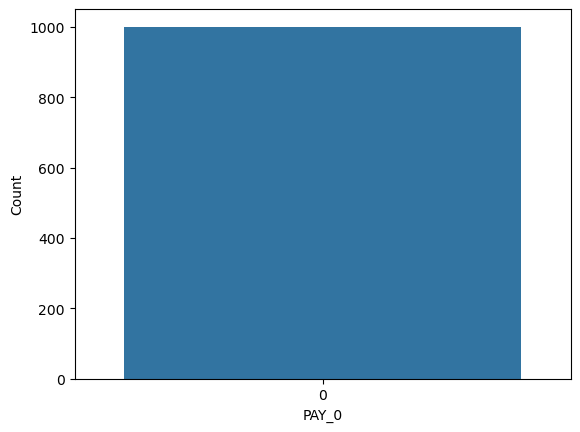

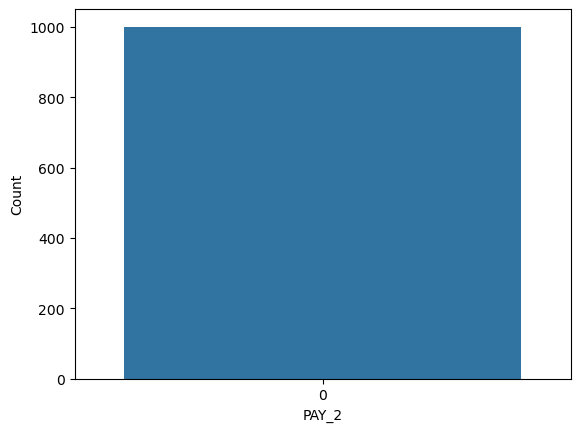

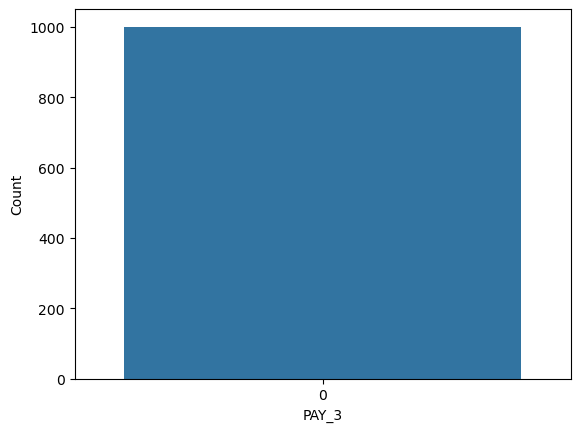

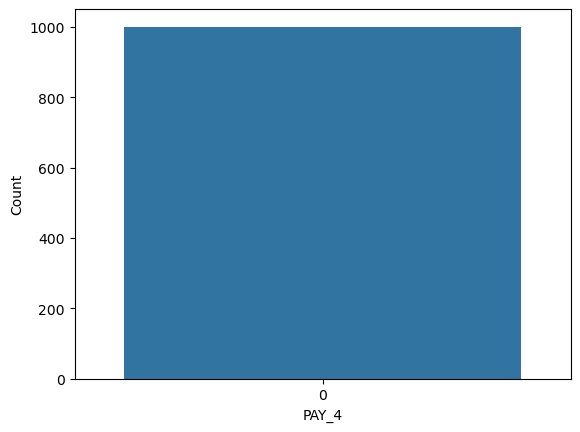

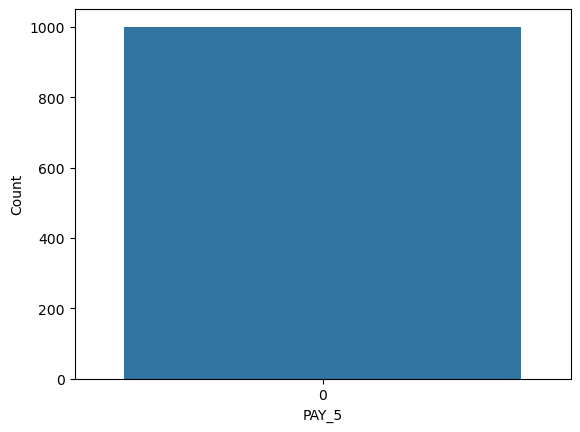

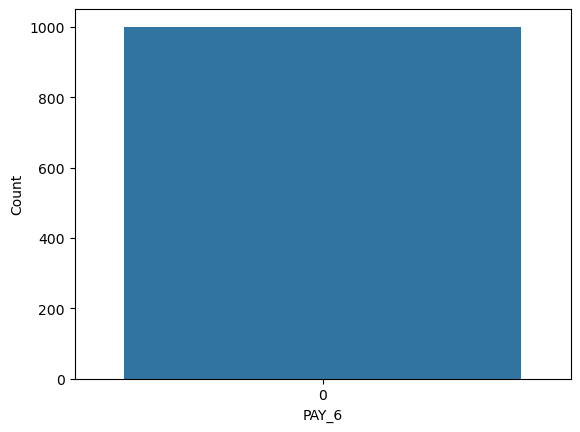

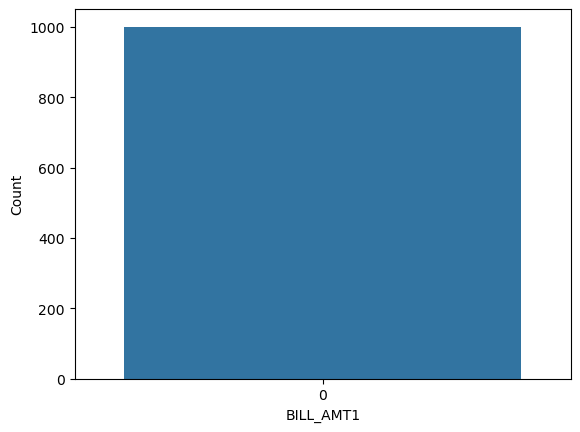

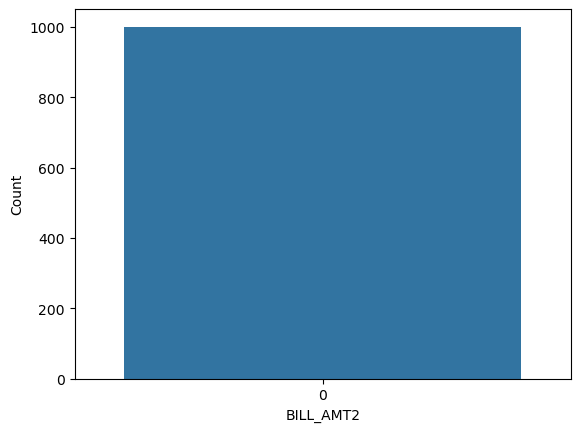

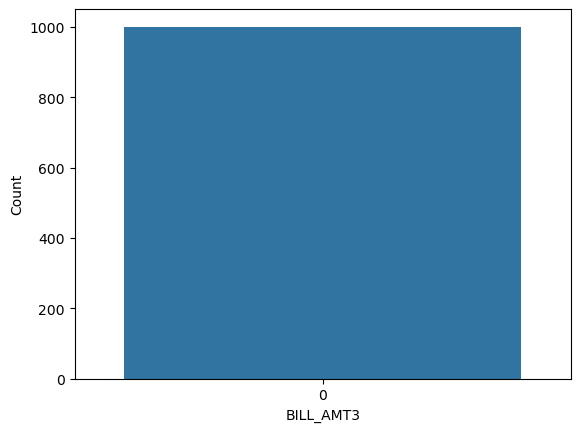

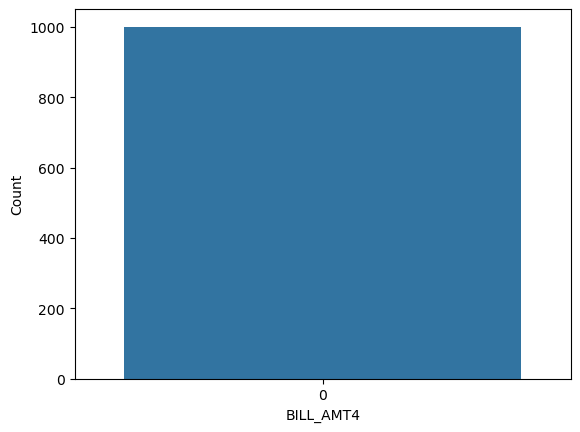

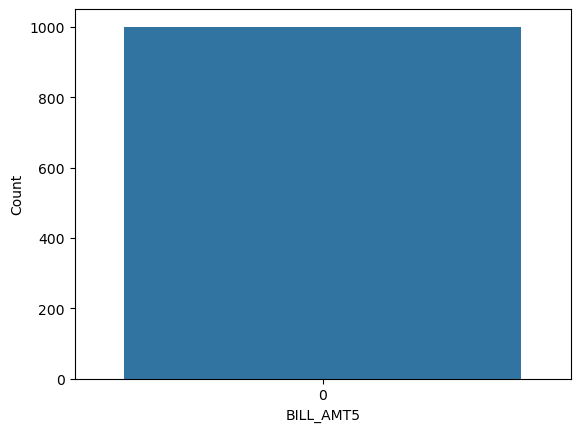

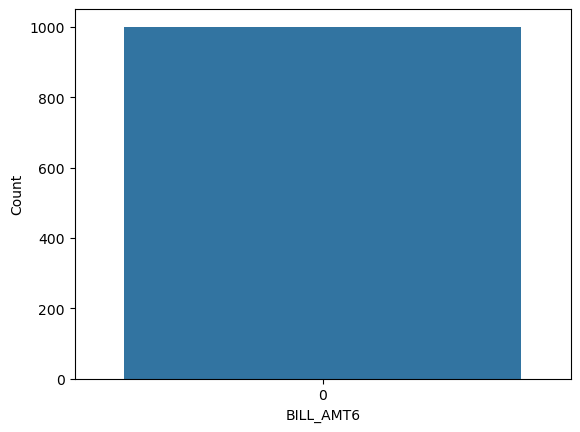

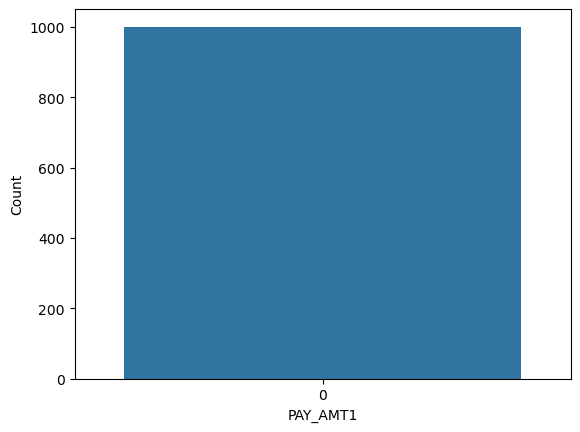

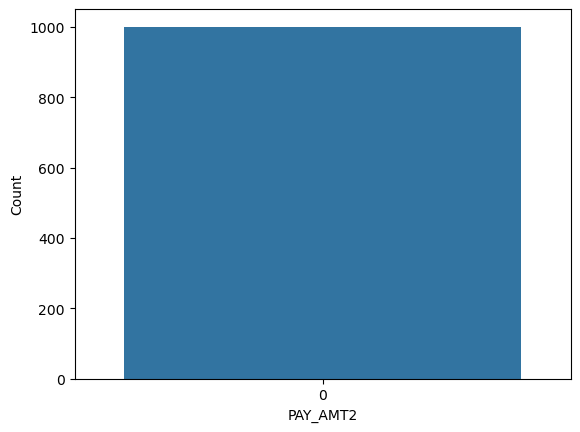

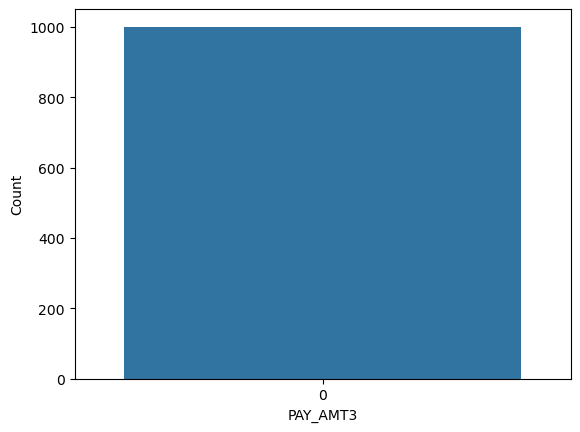

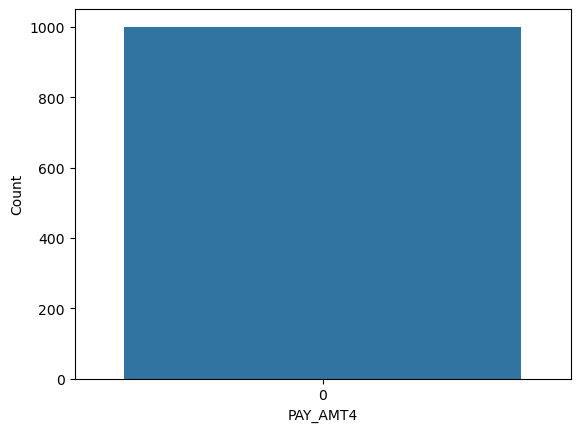

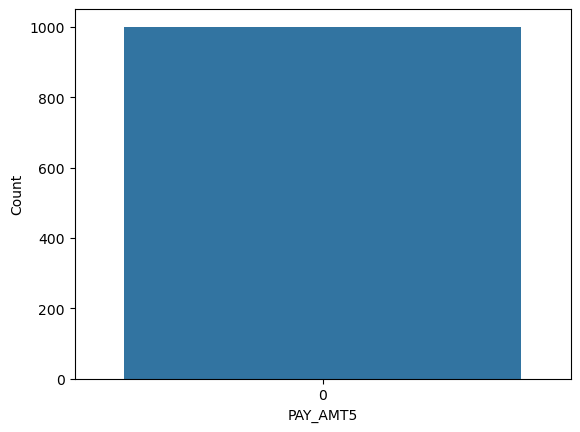

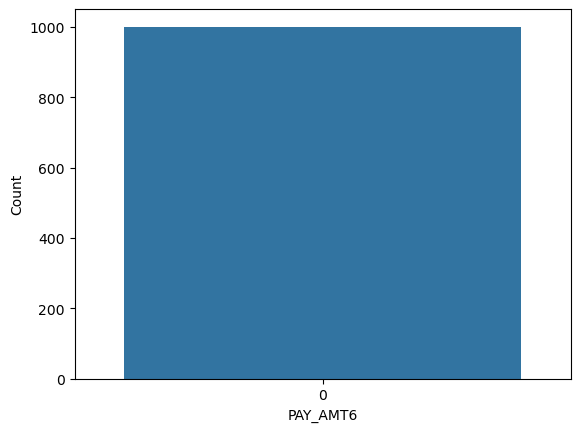

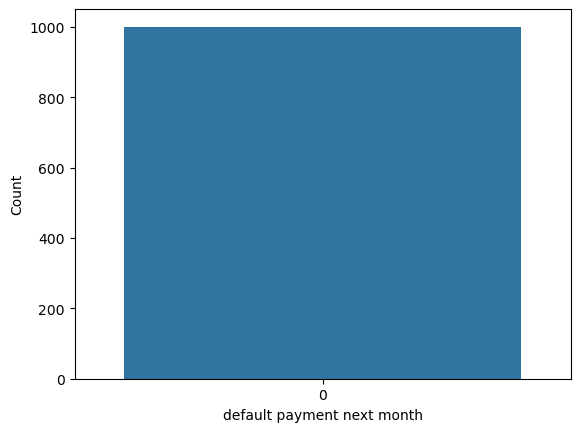

In [11]:
Visualizer(data,'Bar')

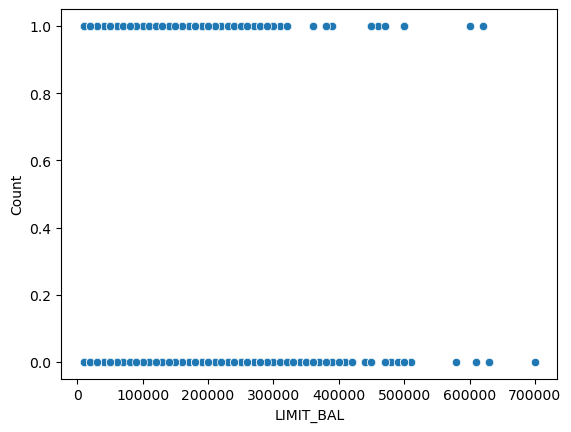

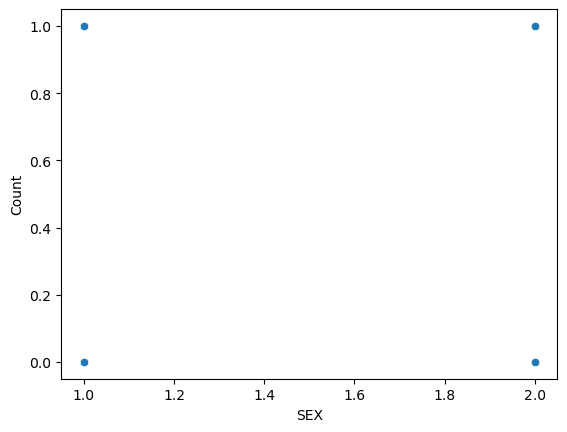

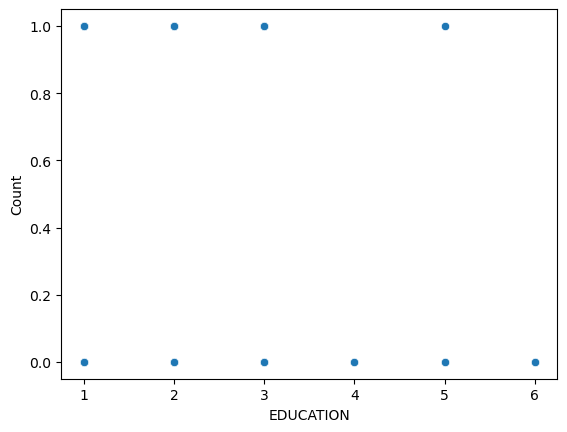

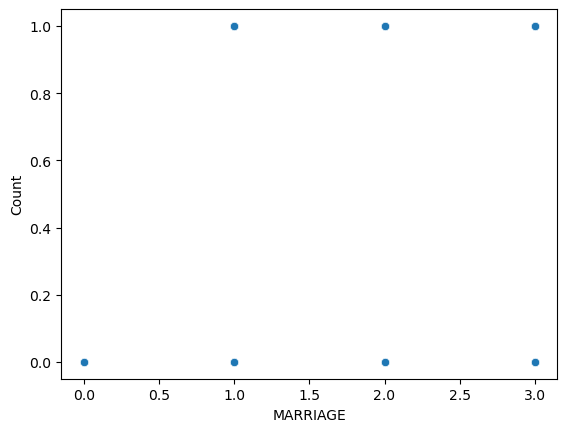

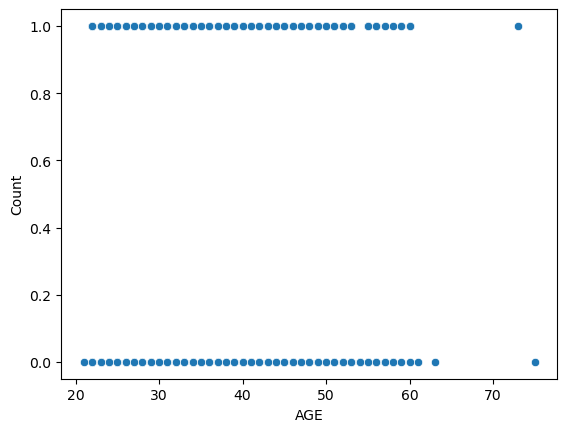

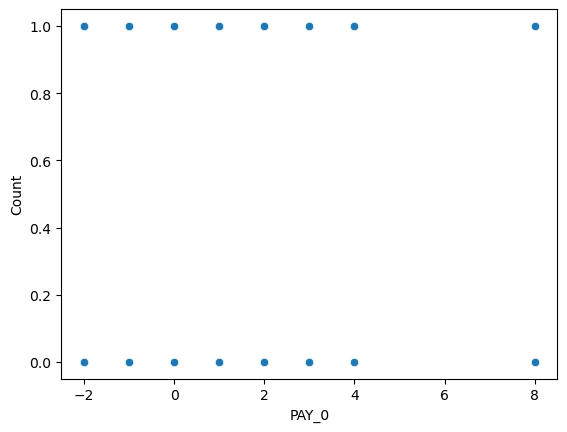

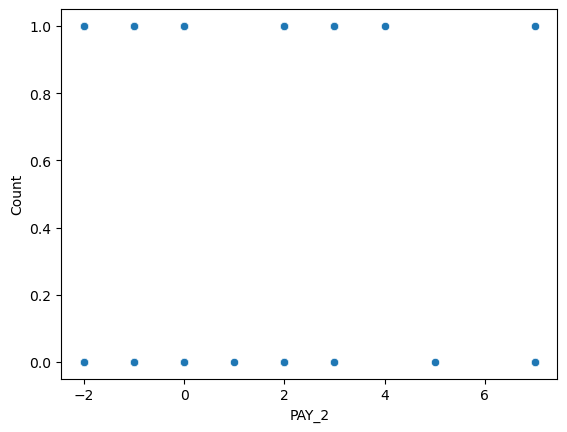

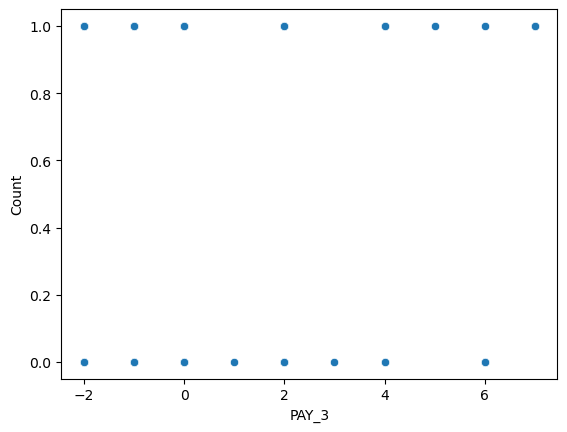

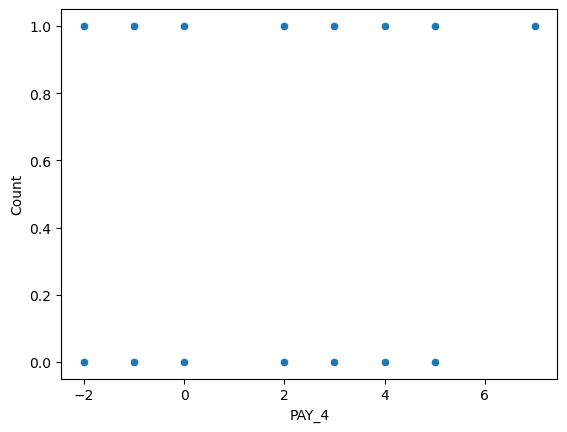

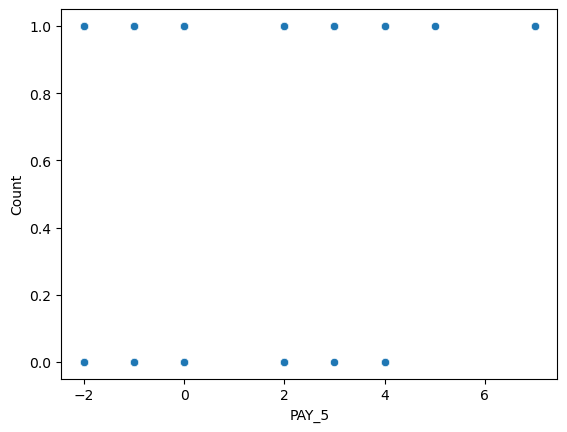

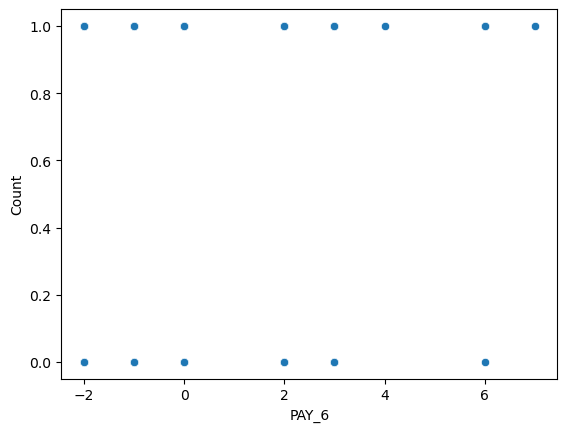

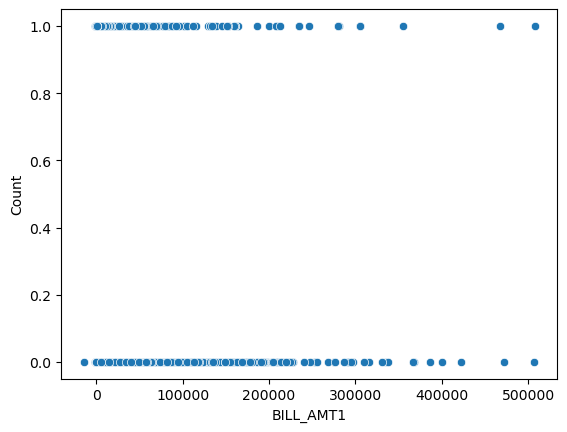

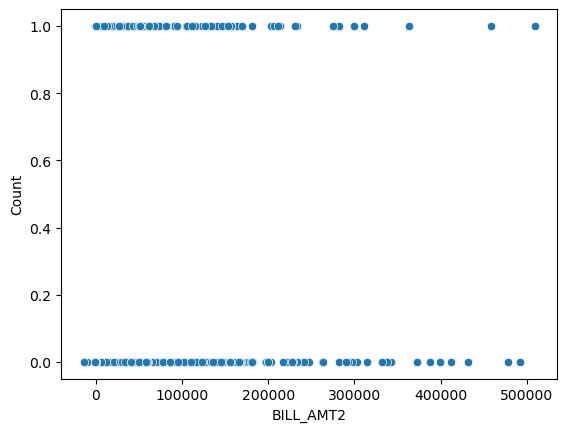

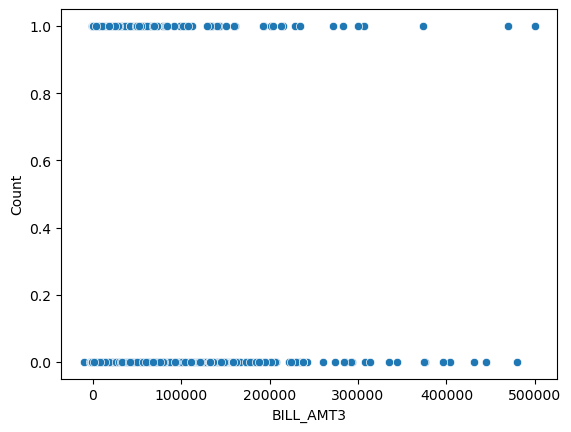

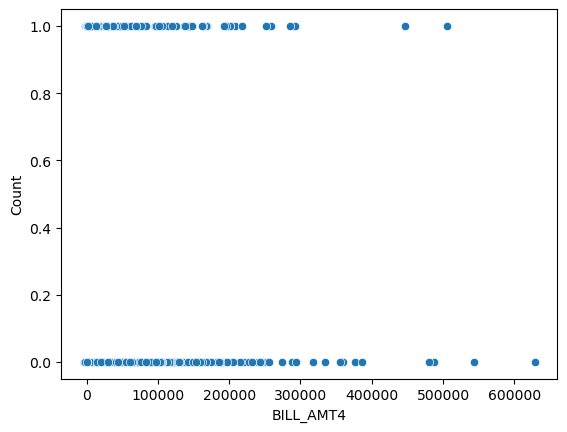

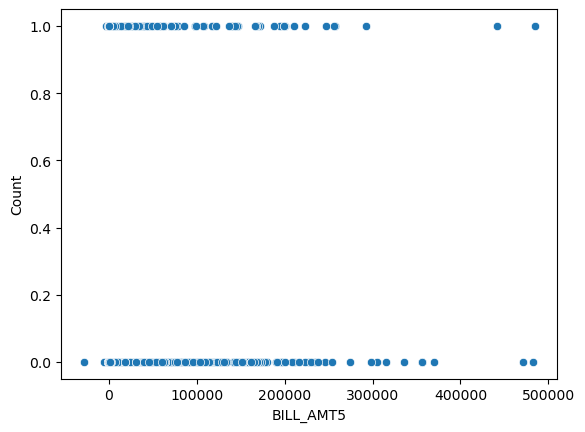

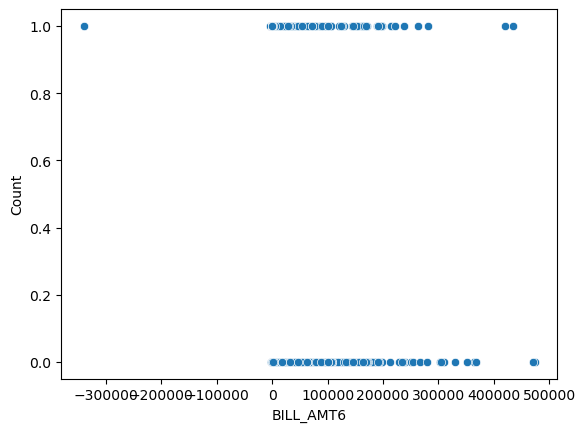

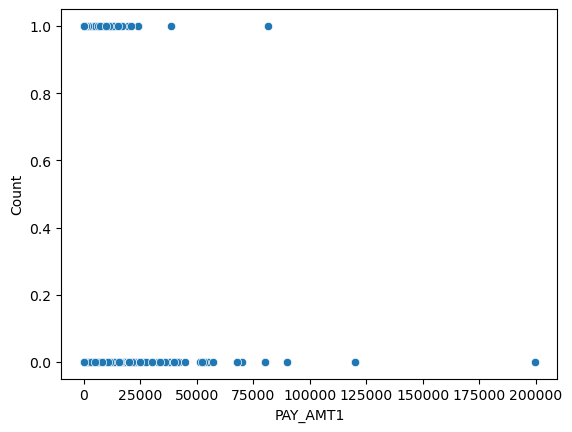

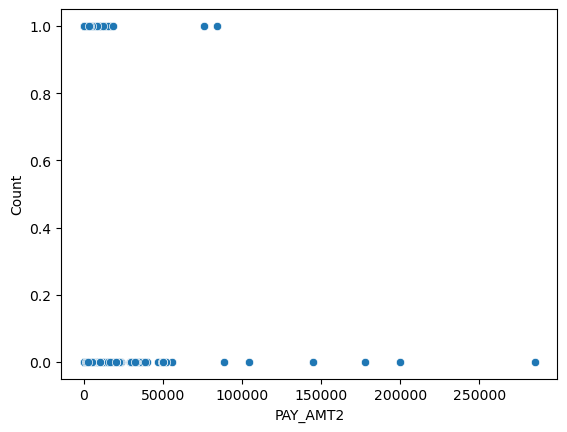

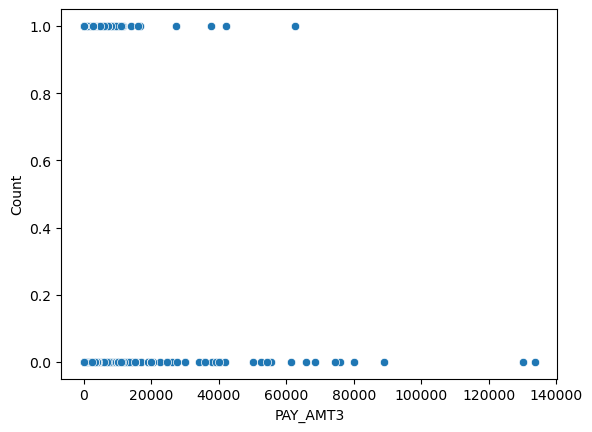

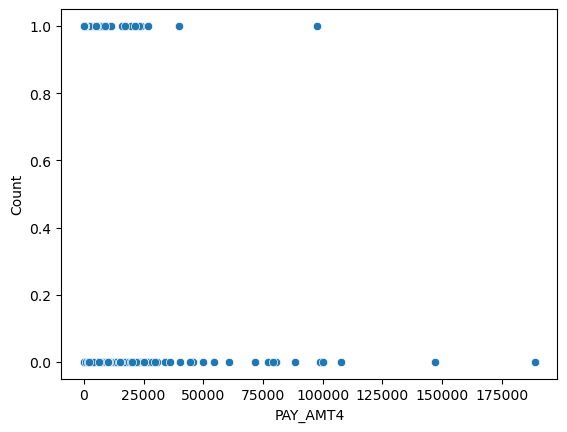

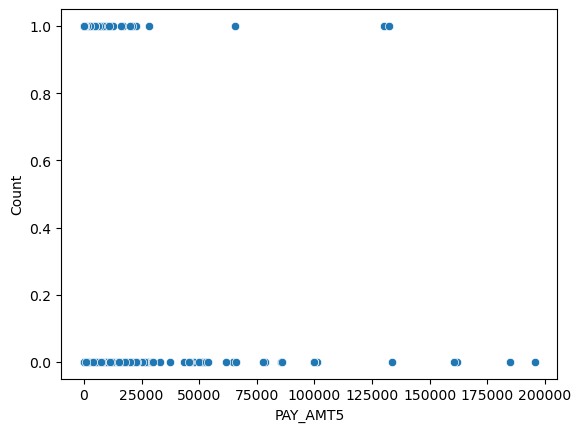

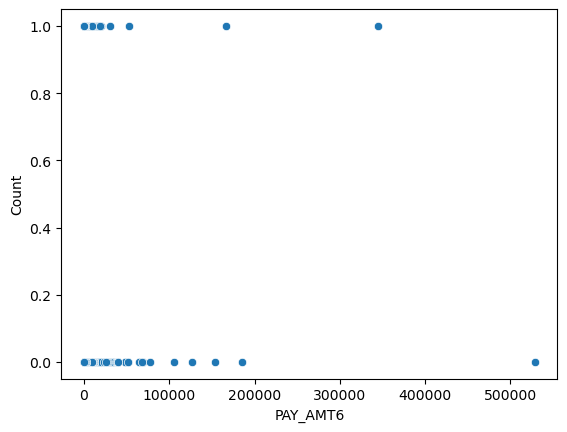

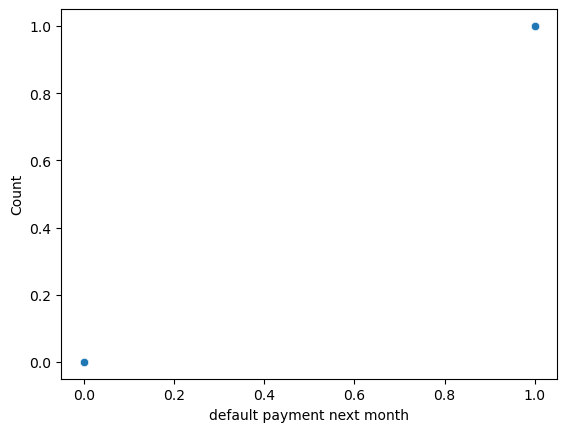

In [12]:
Visualizer(data,'Scatter')

C:\Users\nasim\AppData\Local\Temp\ipykernel_23092\4194455505.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


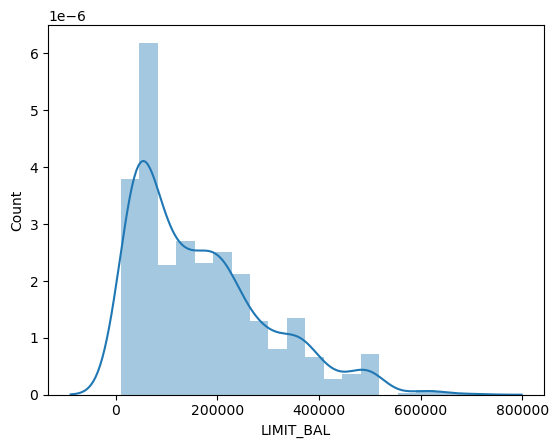

C:\Users\nasim\AppData\Local\Temp\ipykernel_23092\4194455505.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


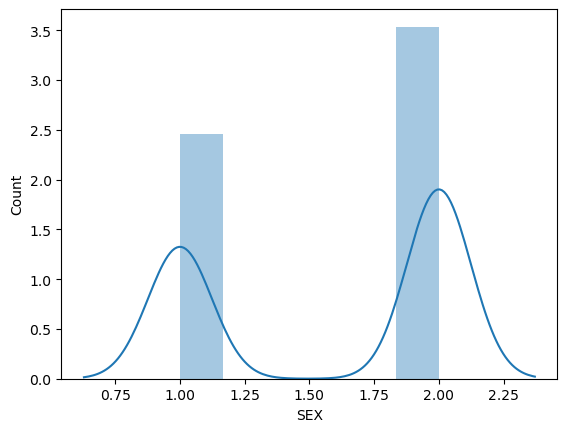

C:\Users\nasim\AppData\Local\Temp\ipykernel_23092\4194455505.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


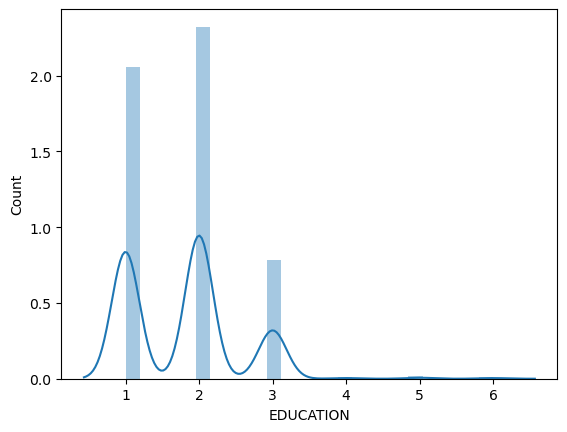

C:\Users\nasim\AppData\Local\Temp\ipykernel_23092\4194455505.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


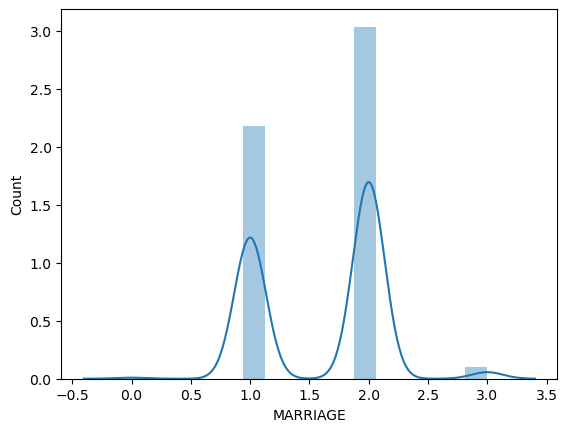

C:\Users\nasim\AppData\Local\Temp\ipykernel_23092\4194455505.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


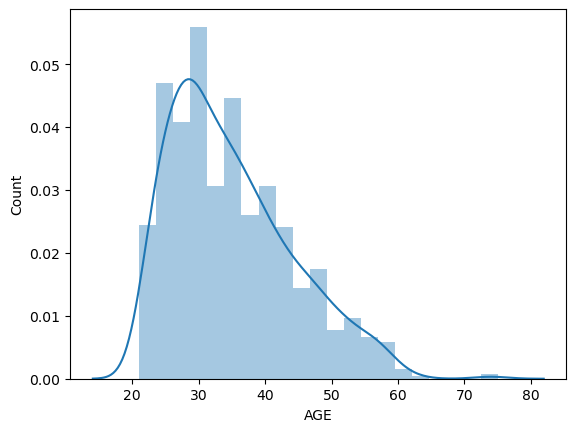

C:\Users\nasim\AppData\Local\Temp\ipykernel_23092\4194455505.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


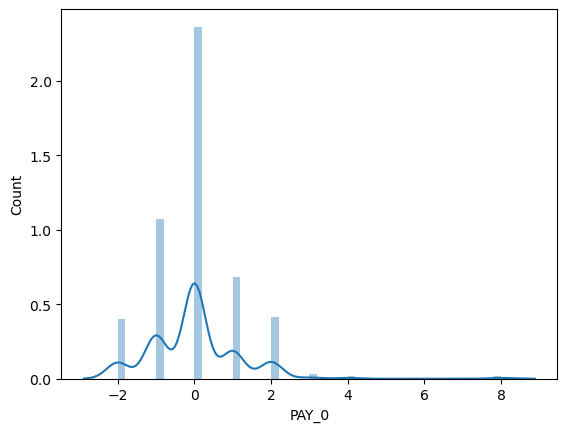

C:\Users\nasim\AppData\Local\Temp\ipykernel_23092\4194455505.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


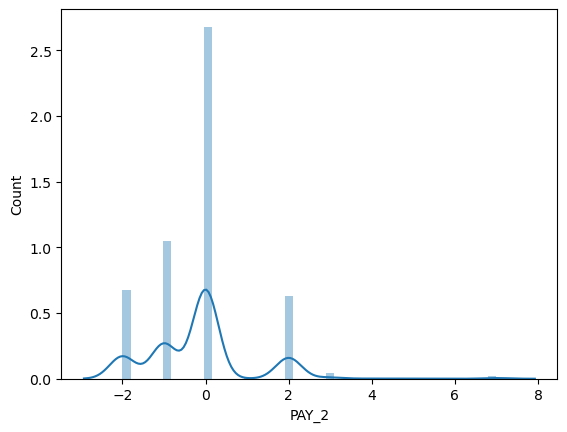

C:\Users\nasim\AppData\Local\Temp\ipykernel_23092\4194455505.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


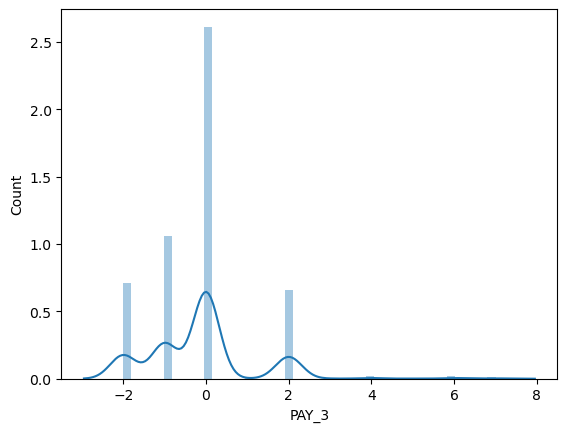

C:\Users\nasim\AppData\Local\Temp\ipykernel_23092\4194455505.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


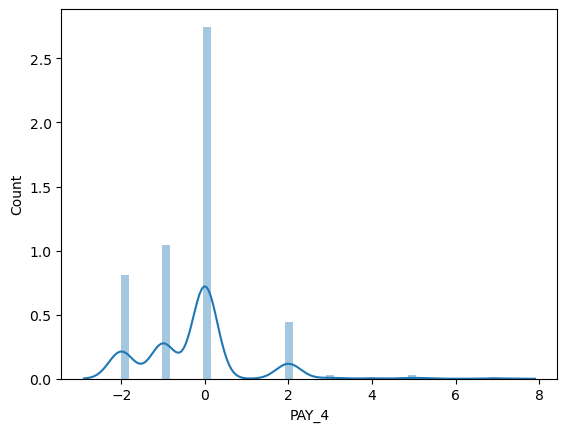

C:\Users\nasim\AppData\Local\Temp\ipykernel_23092\4194455505.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


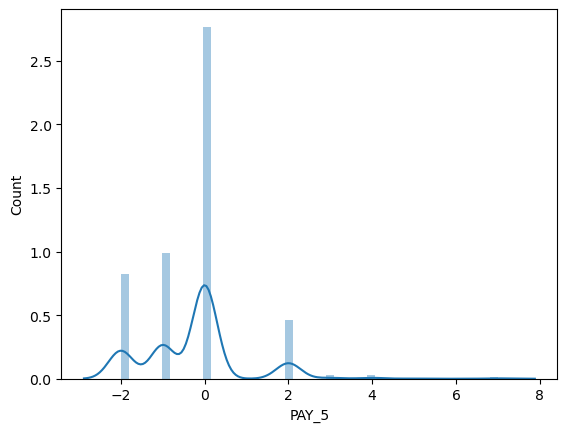

C:\Users\nasim\AppData\Local\Temp\ipykernel_23092\4194455505.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


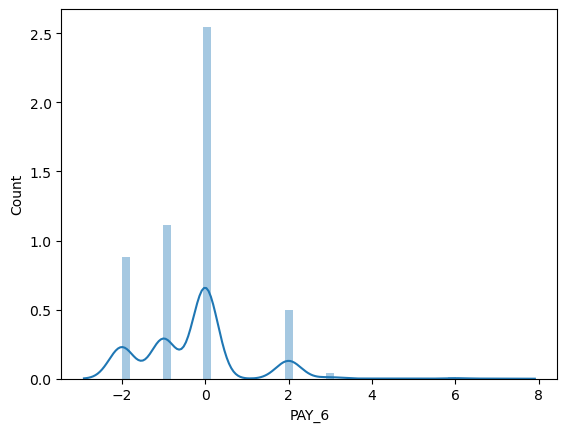

C:\Users\nasim\AppData\Local\Temp\ipykernel_23092\4194455505.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


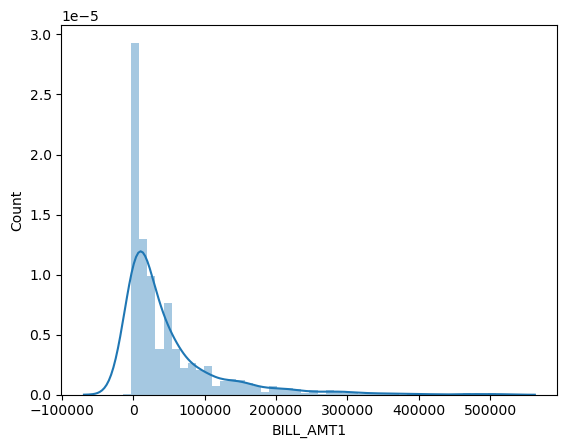

C:\Users\nasim\AppData\Local\Temp\ipykernel_23092\4194455505.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


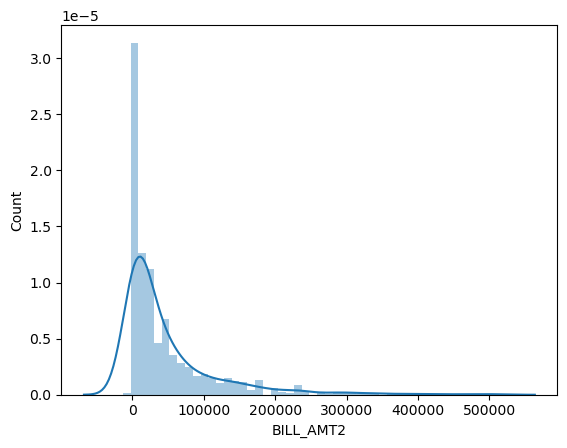

C:\Users\nasim\AppData\Local\Temp\ipykernel_23092\4194455505.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


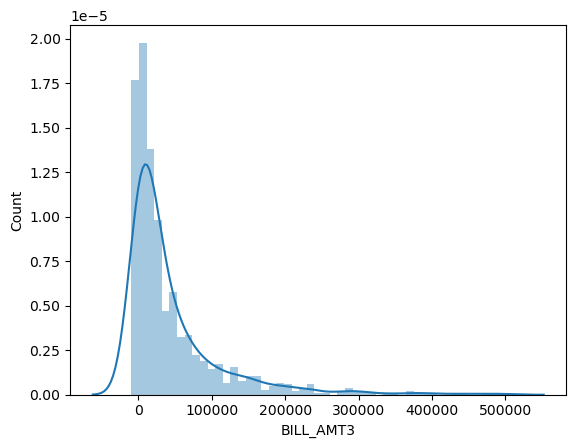

C:\Users\nasim\AppData\Local\Temp\ipykernel_23092\4194455505.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


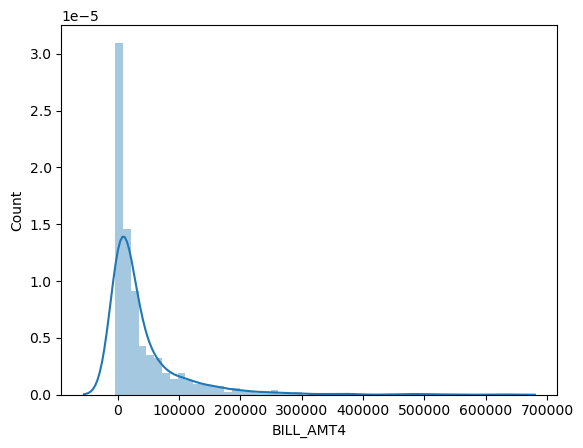

C:\Users\nasim\AppData\Local\Temp\ipykernel_23092\4194455505.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


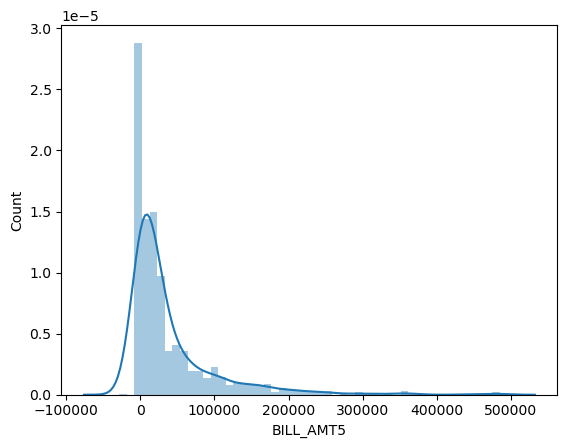

C:\Users\nasim\AppData\Local\Temp\ipykernel_23092\4194455505.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


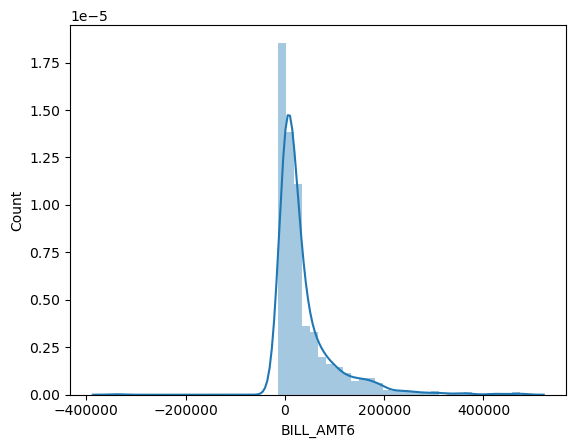

C:\Users\nasim\AppData\Local\Temp\ipykernel_23092\4194455505.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


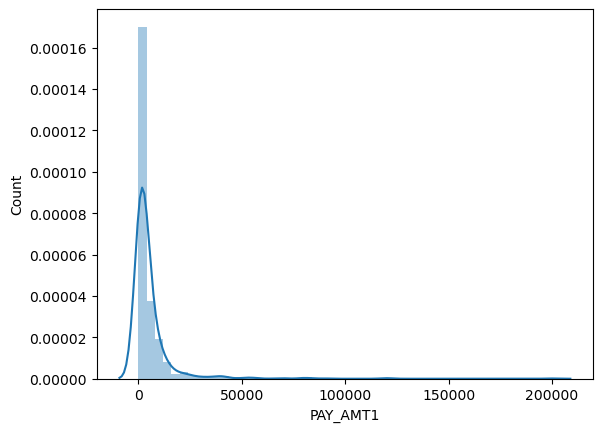

C:\Users\nasim\AppData\Local\Temp\ipykernel_23092\4194455505.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


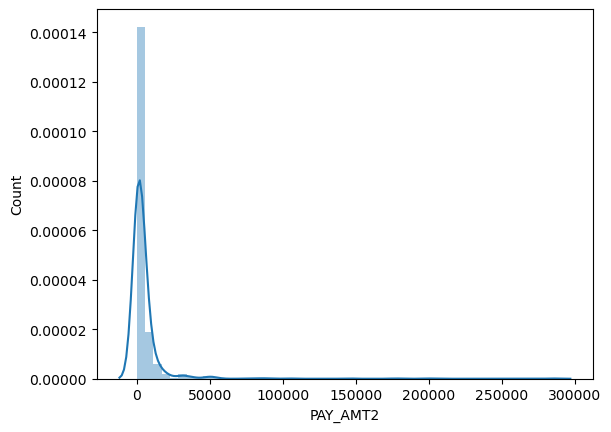

C:\Users\nasim\AppData\Local\Temp\ipykernel_23092\4194455505.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


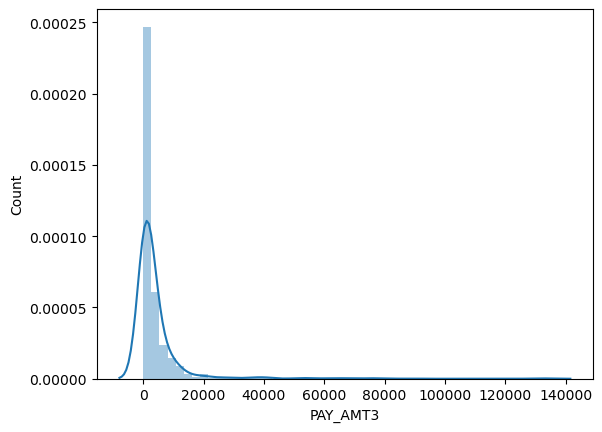

C:\Users\nasim\AppData\Local\Temp\ipykernel_23092\4194455505.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


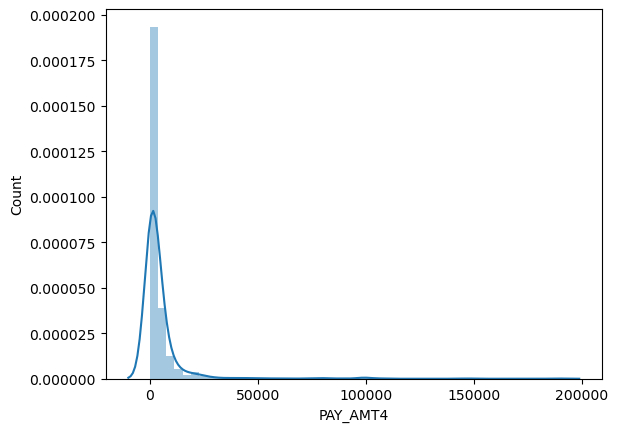

C:\Users\nasim\AppData\Local\Temp\ipykernel_23092\4194455505.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


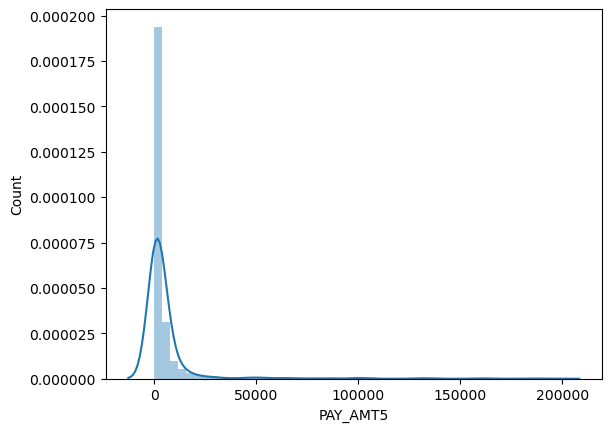

C:\Users\nasim\AppData\Local\Temp\ipykernel_23092\4194455505.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


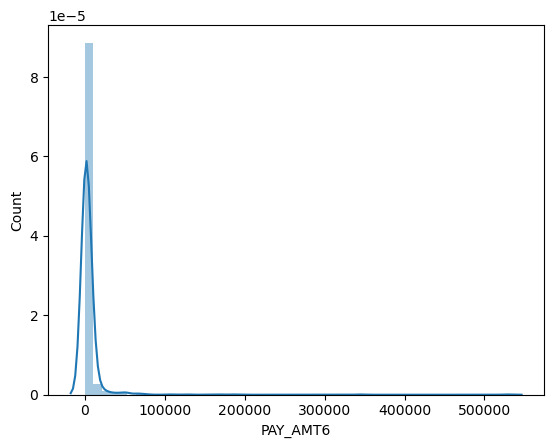

C:\Users\nasim\AppData\Local\Temp\ipykernel_23092\4194455505.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


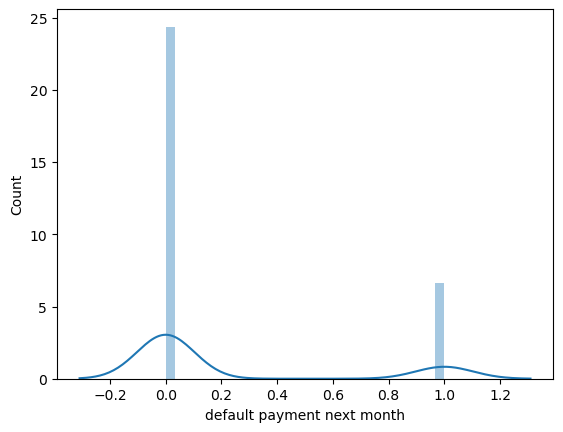

In [13]:
Visualizer(data,'Dist')

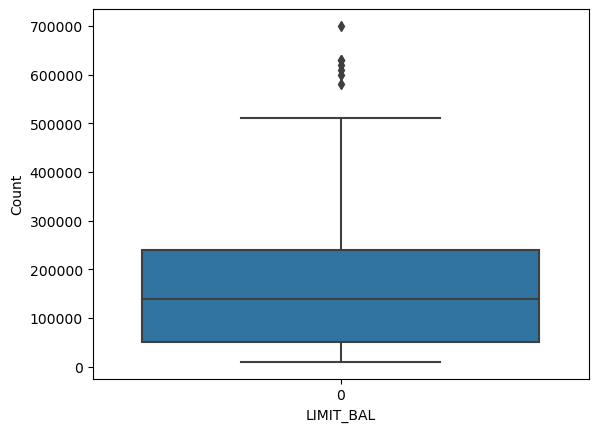

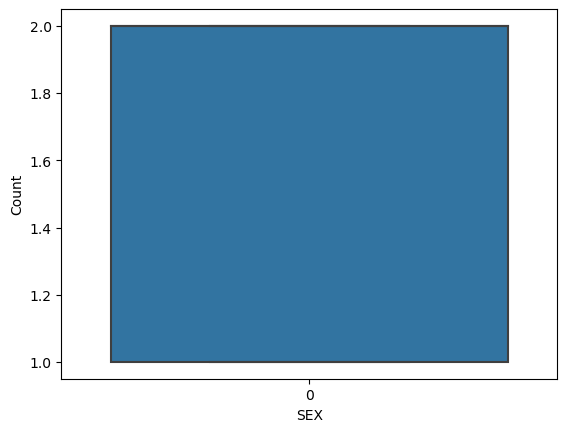

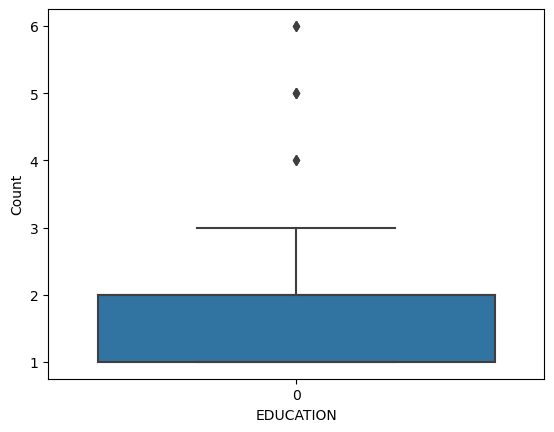

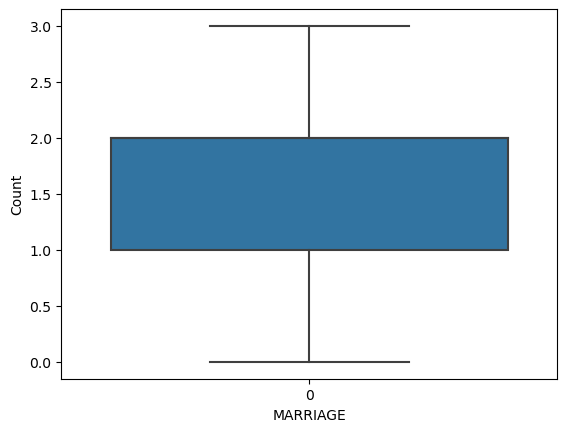

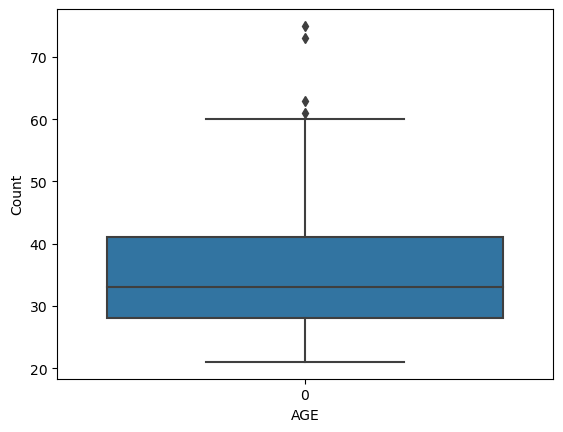

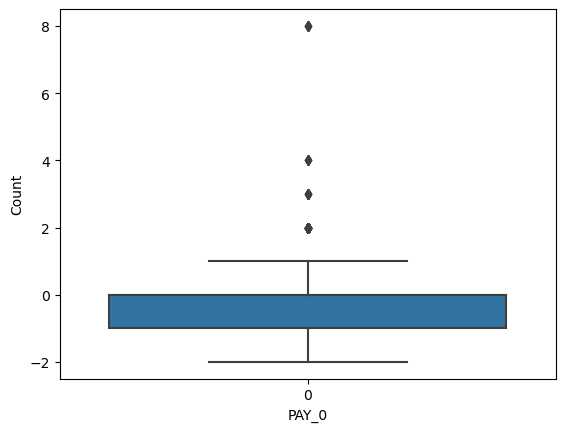

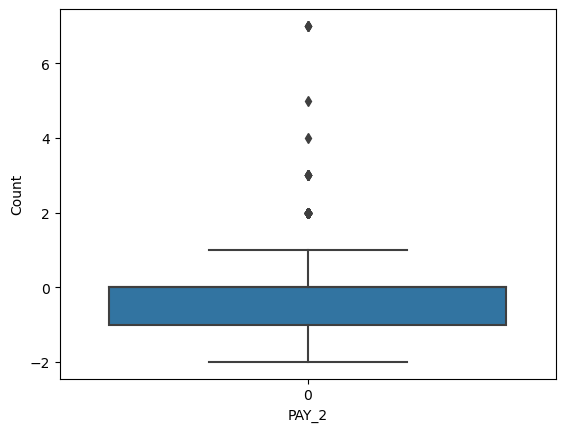

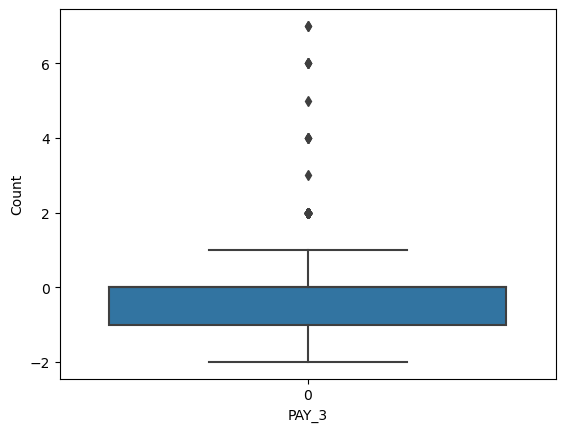

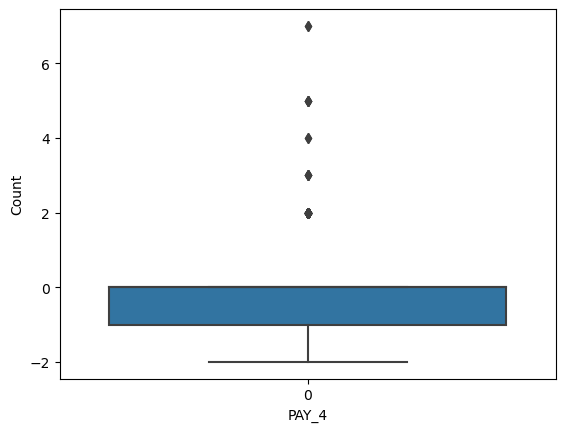

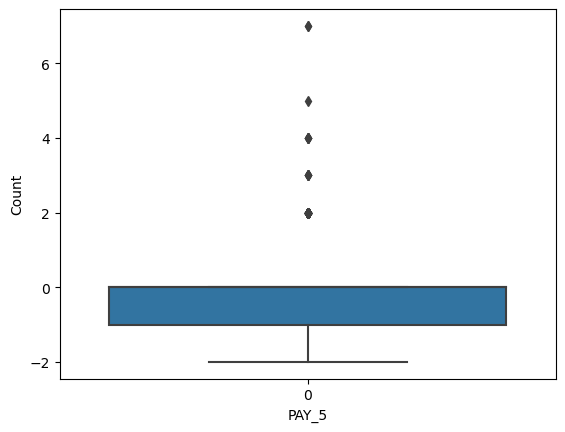

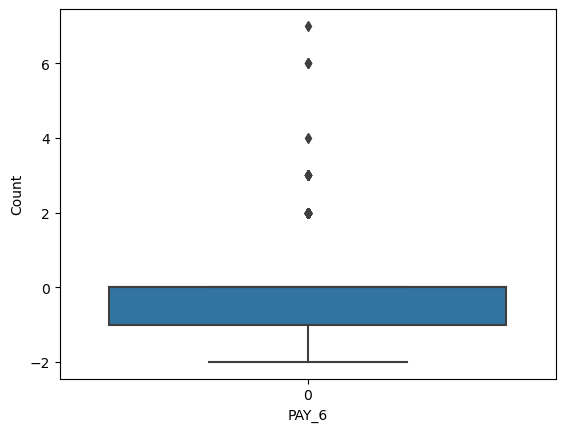

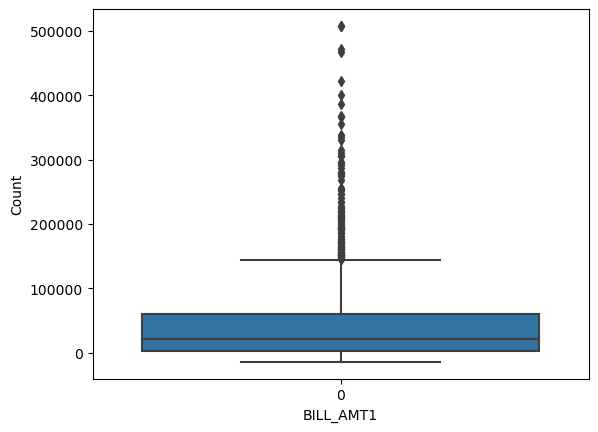

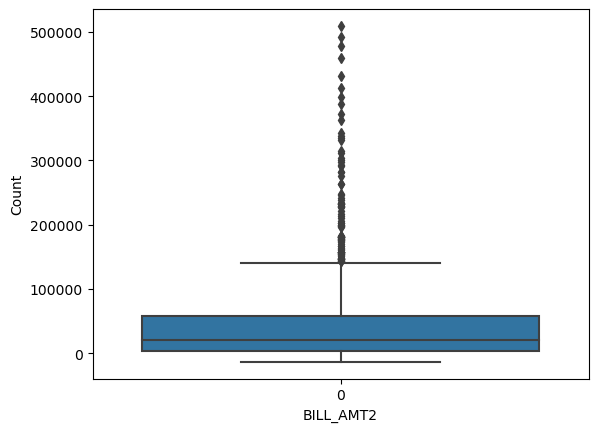

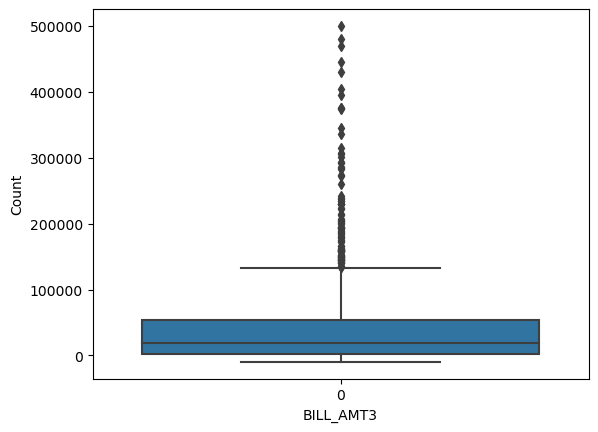

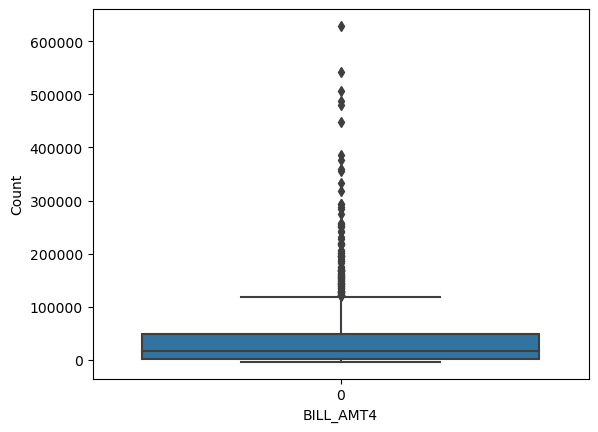

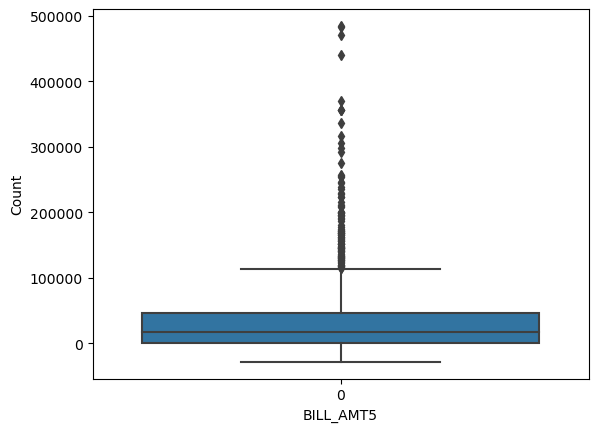

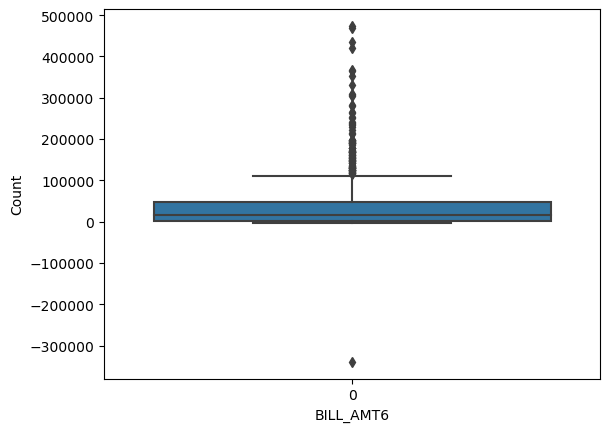

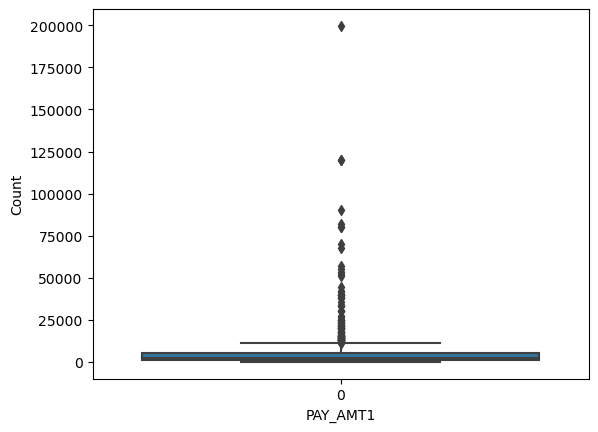

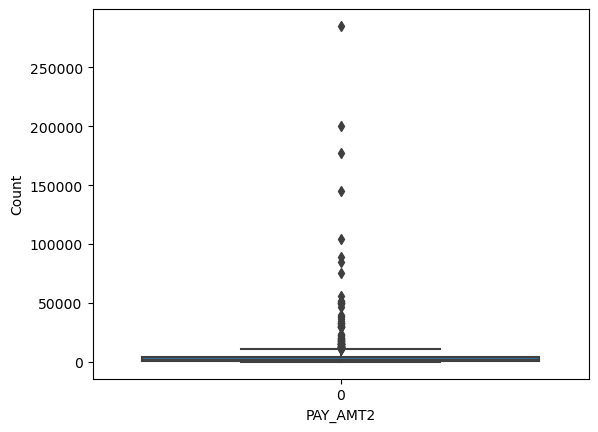

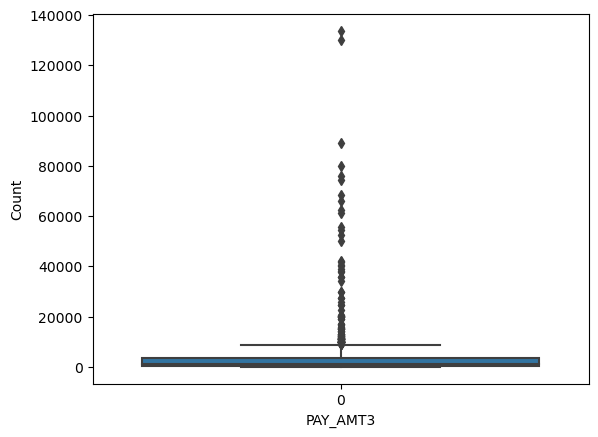

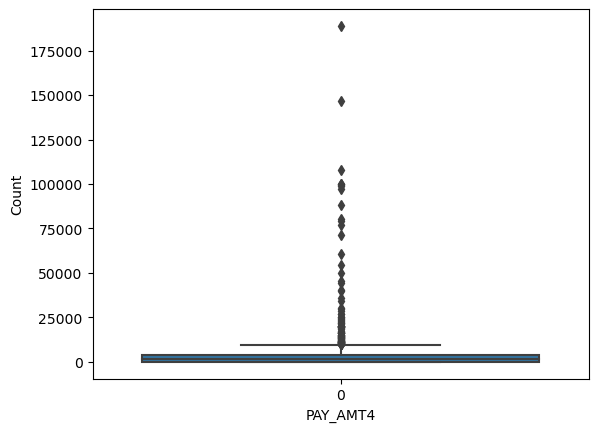

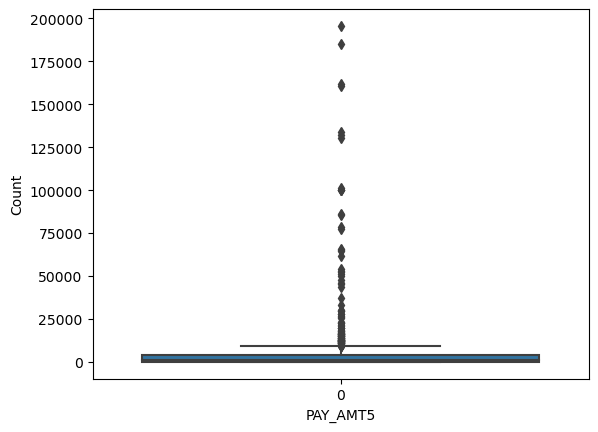

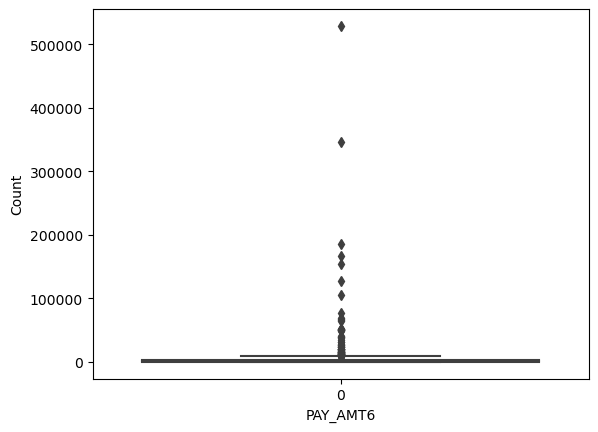

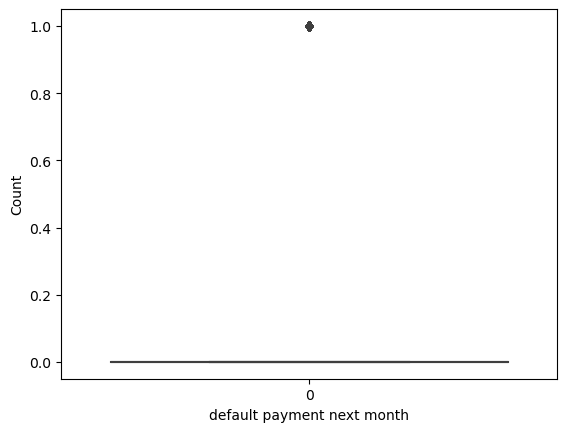

In [15]:
Visualizer(data,'Box')

In [16]:
data.shape

(1001, 24)

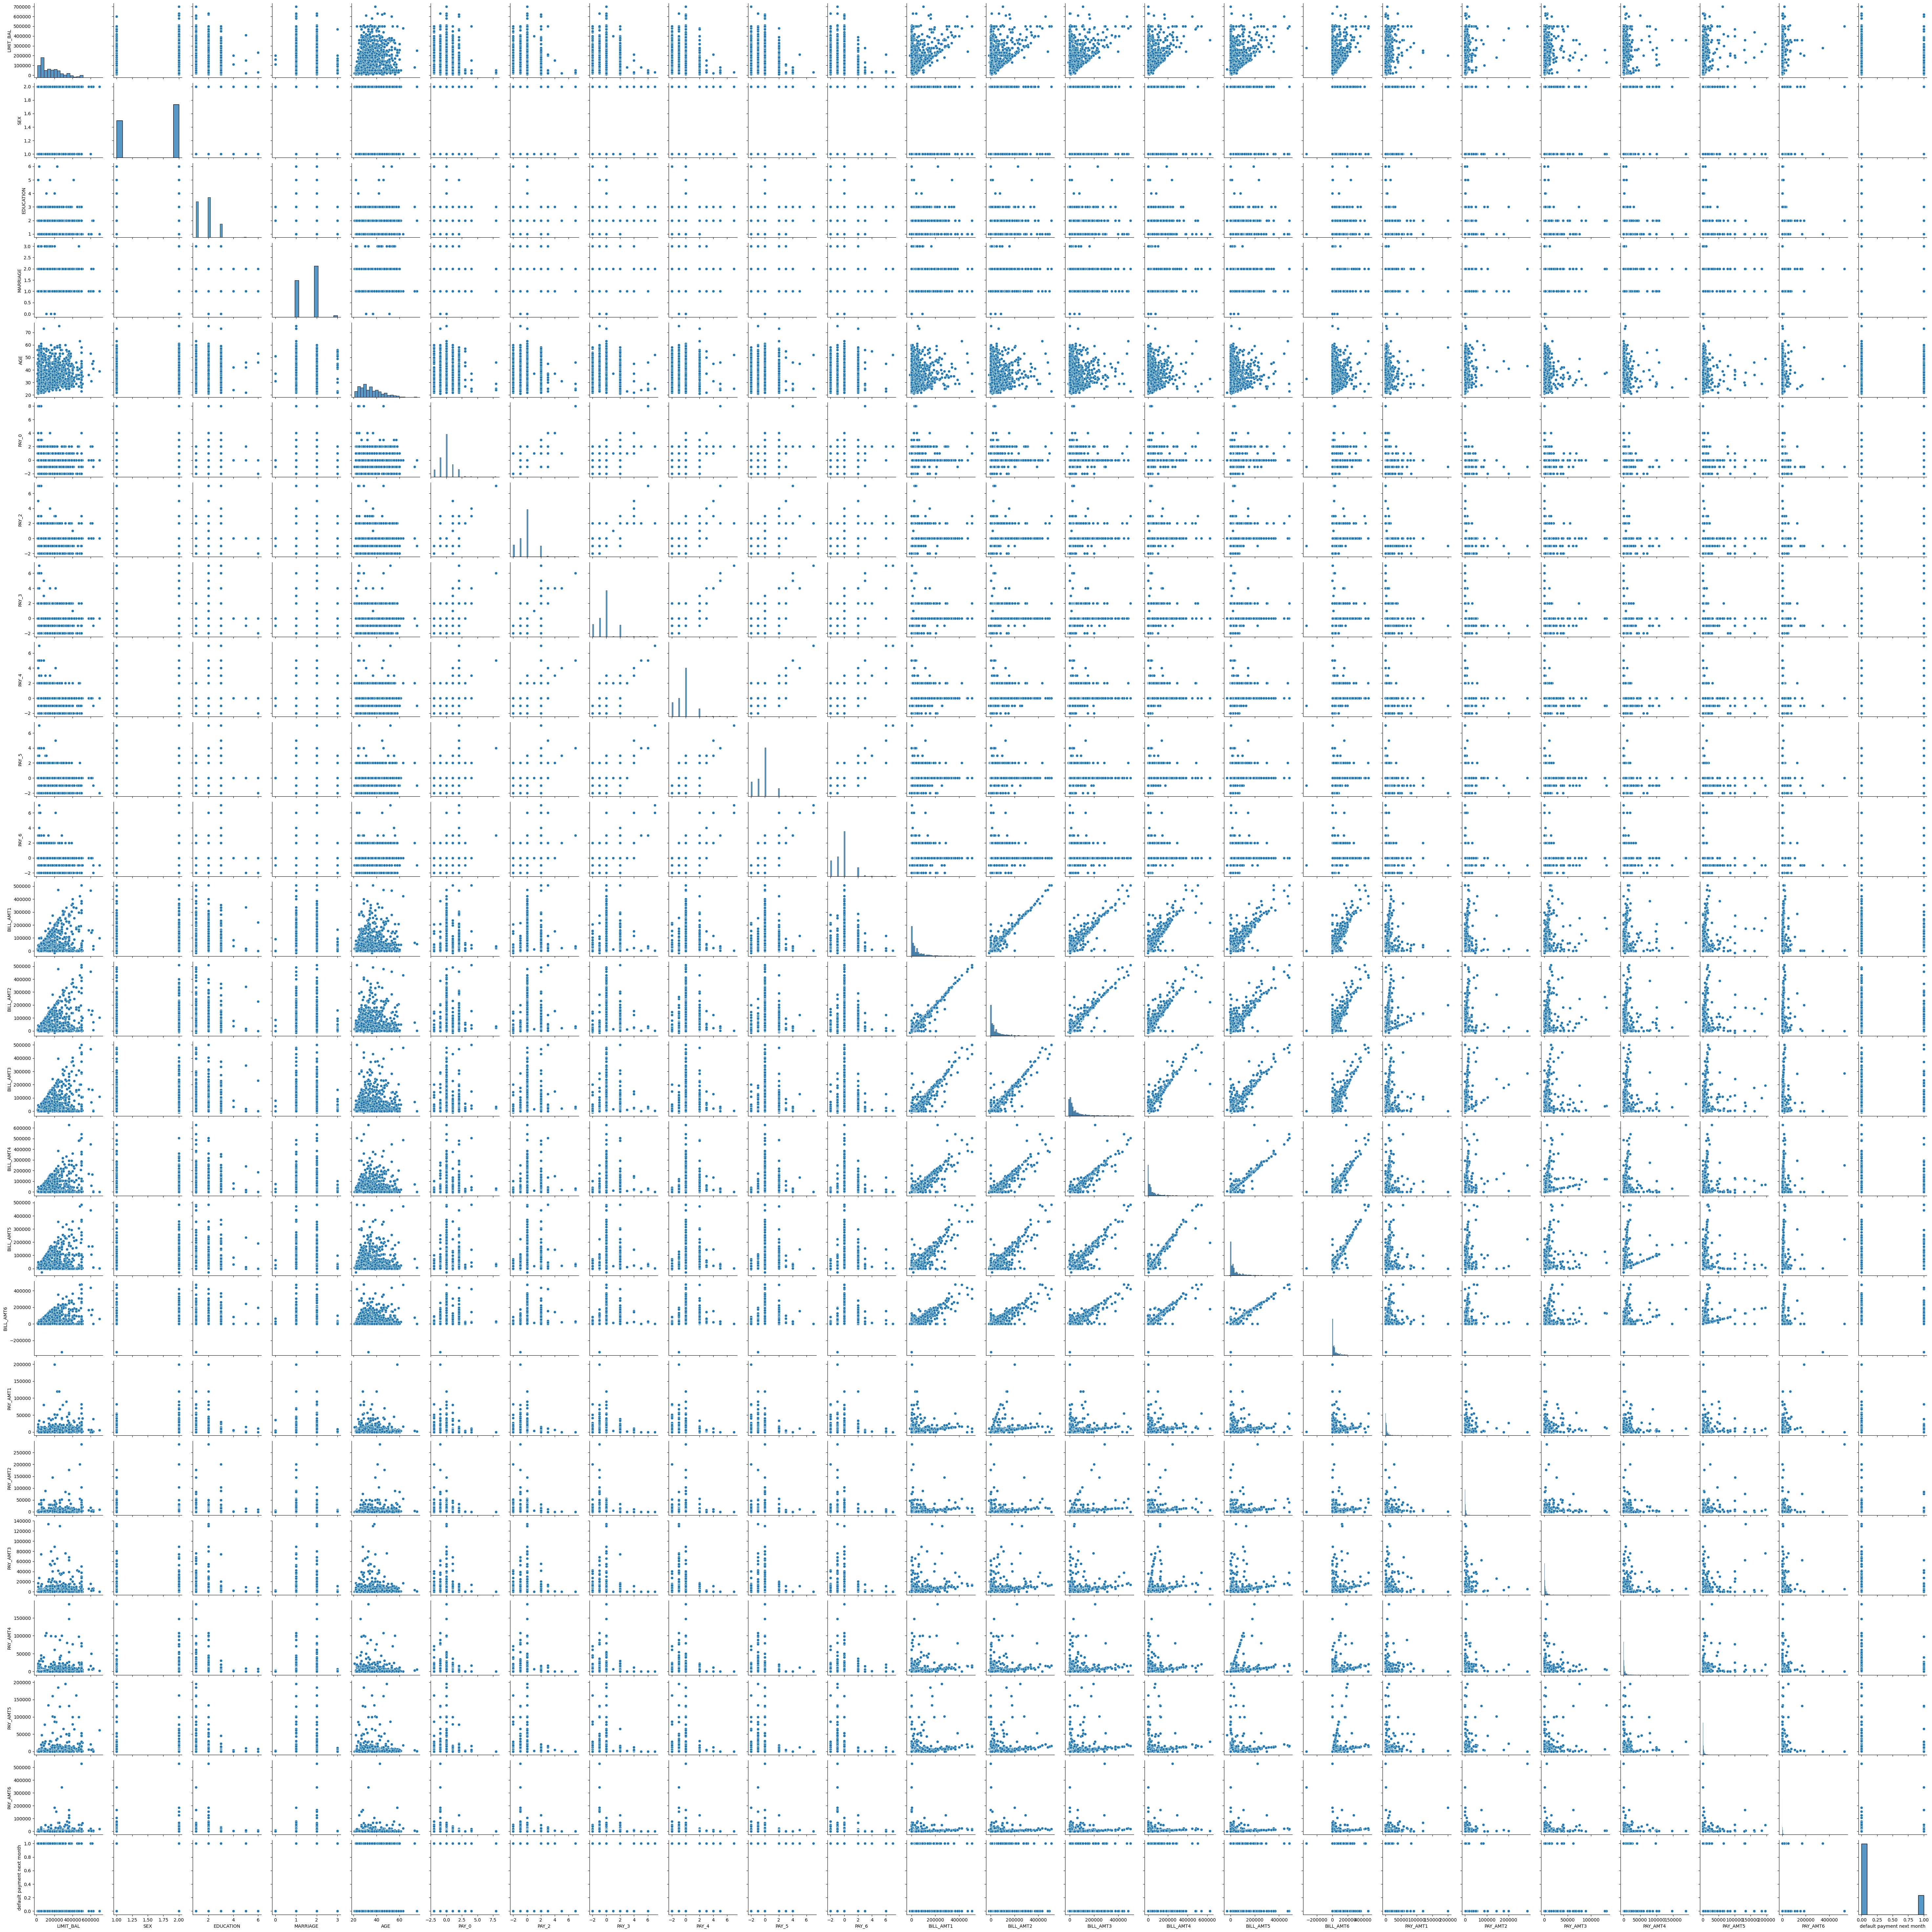

In [17]:
sns.pairplot(data)
plt.show()

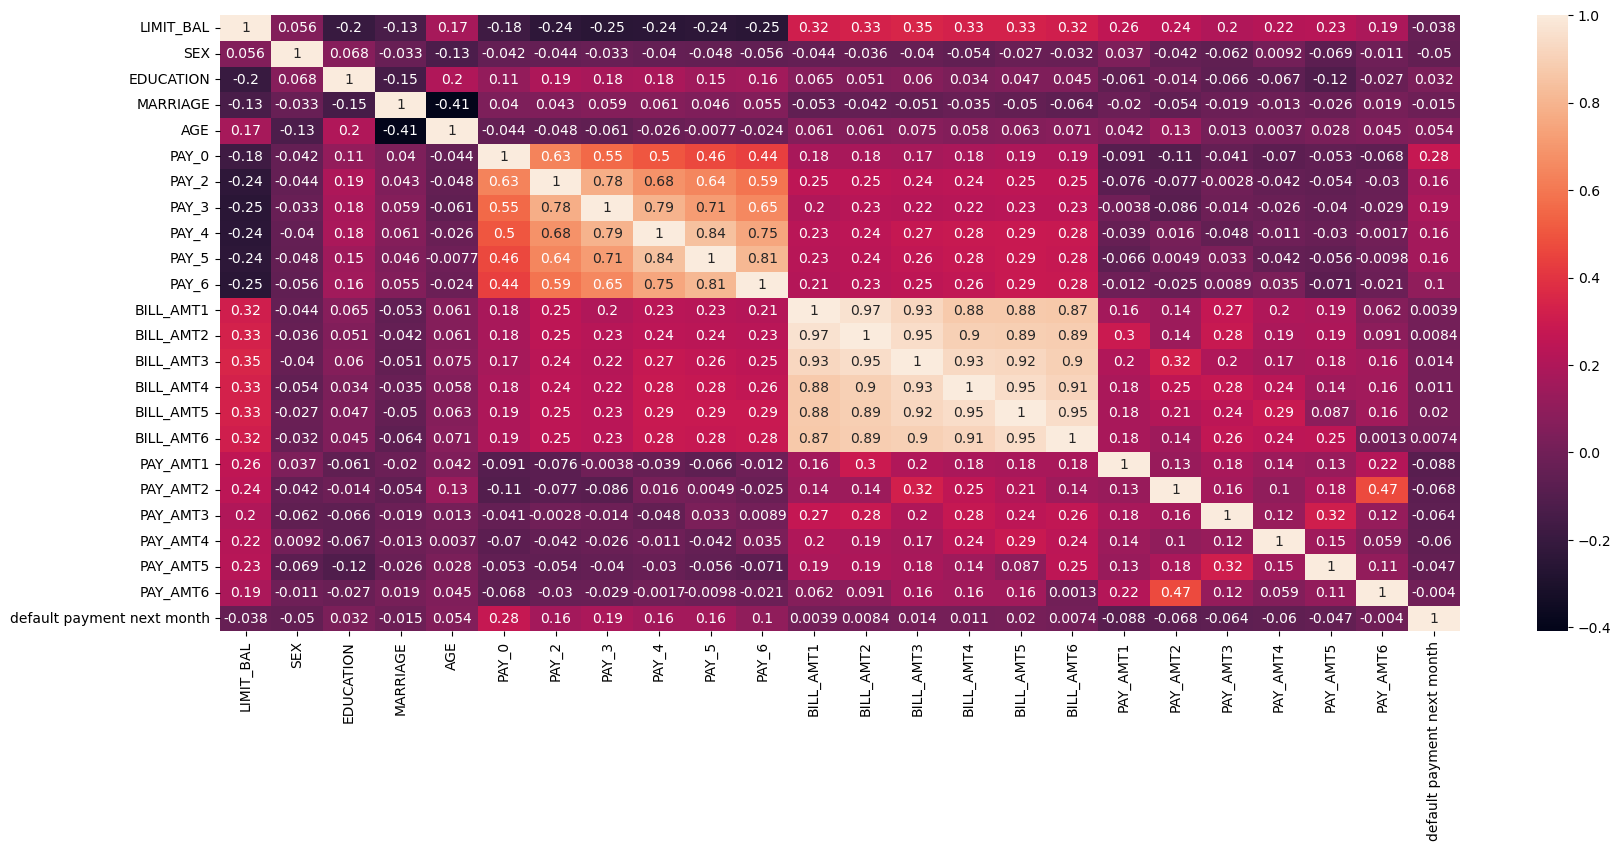

In [24]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [25]:
x=data.drop('default payment next month',axis=1)
y=data['default payment next month']

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import  cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


In [34]:
preprocessor = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), x.columns)
])

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

In [39]:
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipeline.fit(x_train, y_train)
    
    # Cross-validation score
    scores = cross_val_score(pipeline, x_train, y_train, cv=5, scoring='accuracy')
    results[name] = scores.mean()
    
    # Test accuracy
    y_pred = pipeline.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred)
    
    print(f"🔹 {name}:")
    print(f"   ✅ Cross-validation Accuracy: {scores.mean():.4f}")
    print(f"   ✅ Test Accuracy: {test_acc:.4f}")
    print(f"   🔎 Classification Report:\n{classification_report(y_test, y_pred)}")
    print("-" * 60)

# Print overall results
print("🏆 Model Performance Summary:")
for model, score in results.items():
    print(f"{model}: {score:.4f}")

🔹 Logistic Regression:
   ✅ Cross-validation Accuracy: 0.7737
   ✅ Test Accuracy: 0.8507
   🔎 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       167
           1       0.75      0.18      0.29        34

    accuracy                           0.85       201
   macro avg       0.80      0.58      0.60       201
weighted avg       0.84      0.85      0.81       201

------------------------------------------------------------
🔹 Decision Tree:
   ✅ Cross-validation Accuracy: 0.6937
   ✅ Test Accuracy: 0.7811
   🔎 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       167
           1       0.37      0.41      0.39        34

    accuracy                           0.78       201
   macro avg       0.62      0.63      0.63       201
weighted avg       0.79      0.78      0.79       201

---------------------------------------------------------